This project is about analyzing water levels in Chennai.

### Import required Libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
chennai = pd.read_csv('chennai_reservoir_levels.csv')
chennai.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5642,13-06-2019,30.0,0.0,0.0,1.0
5643,14-06-2019,28.0,0.0,0.0,1.0
5644,15-06-2019,27.0,0.0,0.0,1.0
5645,16-06-2019,26.0,0.0,0.0,1.0
5646,17-06-2019,25.0,0.0,0.0,1.0


In [76]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [77]:
import datetime
chennai['Date'] = pd.to_datetime(chennai['Date'],format='%d-%m-%Y')

In [78]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [79]:
chennai['month'] = chennai['Date'].apply(lambda x : x.month)
chennai.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,month
0,2004-01-01,3.9,0.0,268.0,0.0,1
1,2004-01-02,3.9,0.0,268.0,0.0,1
2,2004-01-03,3.9,0.0,267.0,0.0,1
3,2004-01-04,3.9,0.0,267.0,0.0,1
4,2004-01-05,3.8,0.0,267.0,0.0,1


In [80]:
chennai['Year'] = chennai['Date'].apply(lambda x : x.year)
chennai.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,month,Year
0,2004-01-01,3.9,0.0,268.0,0.0,1,2004
1,2004-01-02,3.9,0.0,268.0,0.0,1,2004
2,2004-01-03,3.9,0.0,267.0,0.0,1,2004
3,2004-01-04,3.9,0.0,267.0,0.0,1,2004
4,2004-01-05,3.8,0.0,267.0,0.0,1,2004


In [82]:
chennai_after_2012 = chennai[chennai['Year']>2012]
chennai_before_2012= chennai[chennai['Year']<2012]

In [21]:
chennai['Total'] = chennai[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].sum(axis=1)
chennai.head(3)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,month,Year,Total
0,2004-01-01,3.9,0.0,268.0,0.0,1,2004,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,1,2004,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,1,2004,270.9


In [33]:
Yearwise = chennai[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM','Total','Year']].groupby('Year',as_index=False).mean()

In [34]:
Monthwise = chennai[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM','Total','month']].groupby('month',as_index=False).mean()

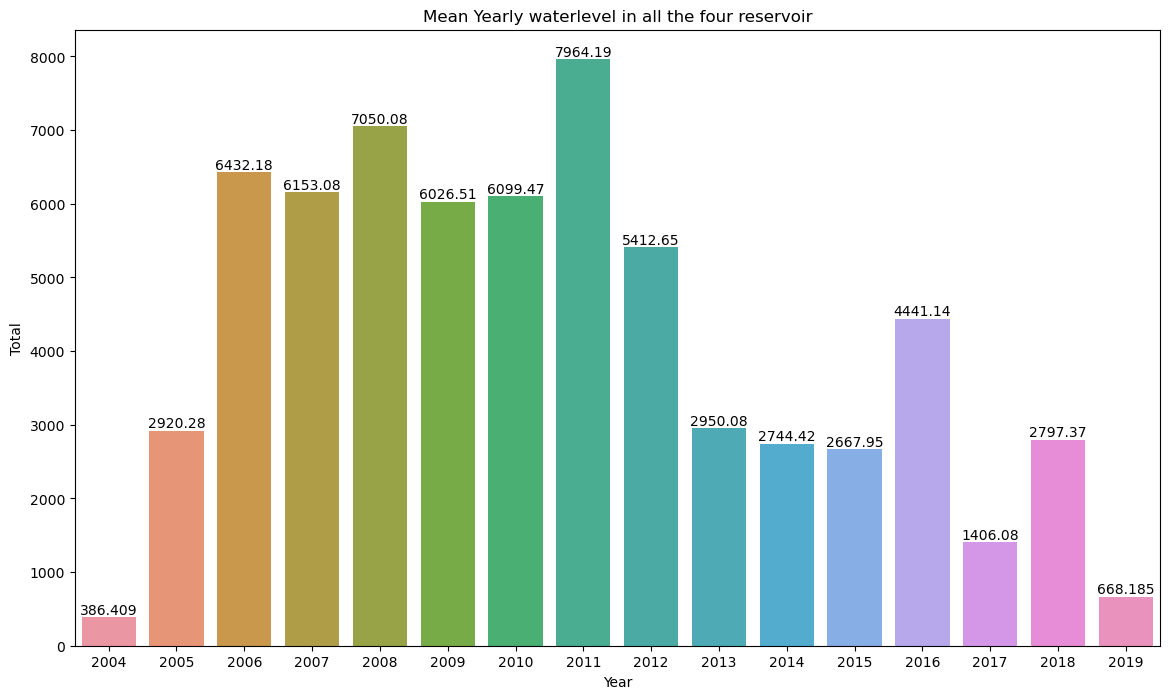

In [37]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='Year',y='Total',data=Yearwise)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Mean Yearly waterlevel in all the four reservoir')
plt.show()

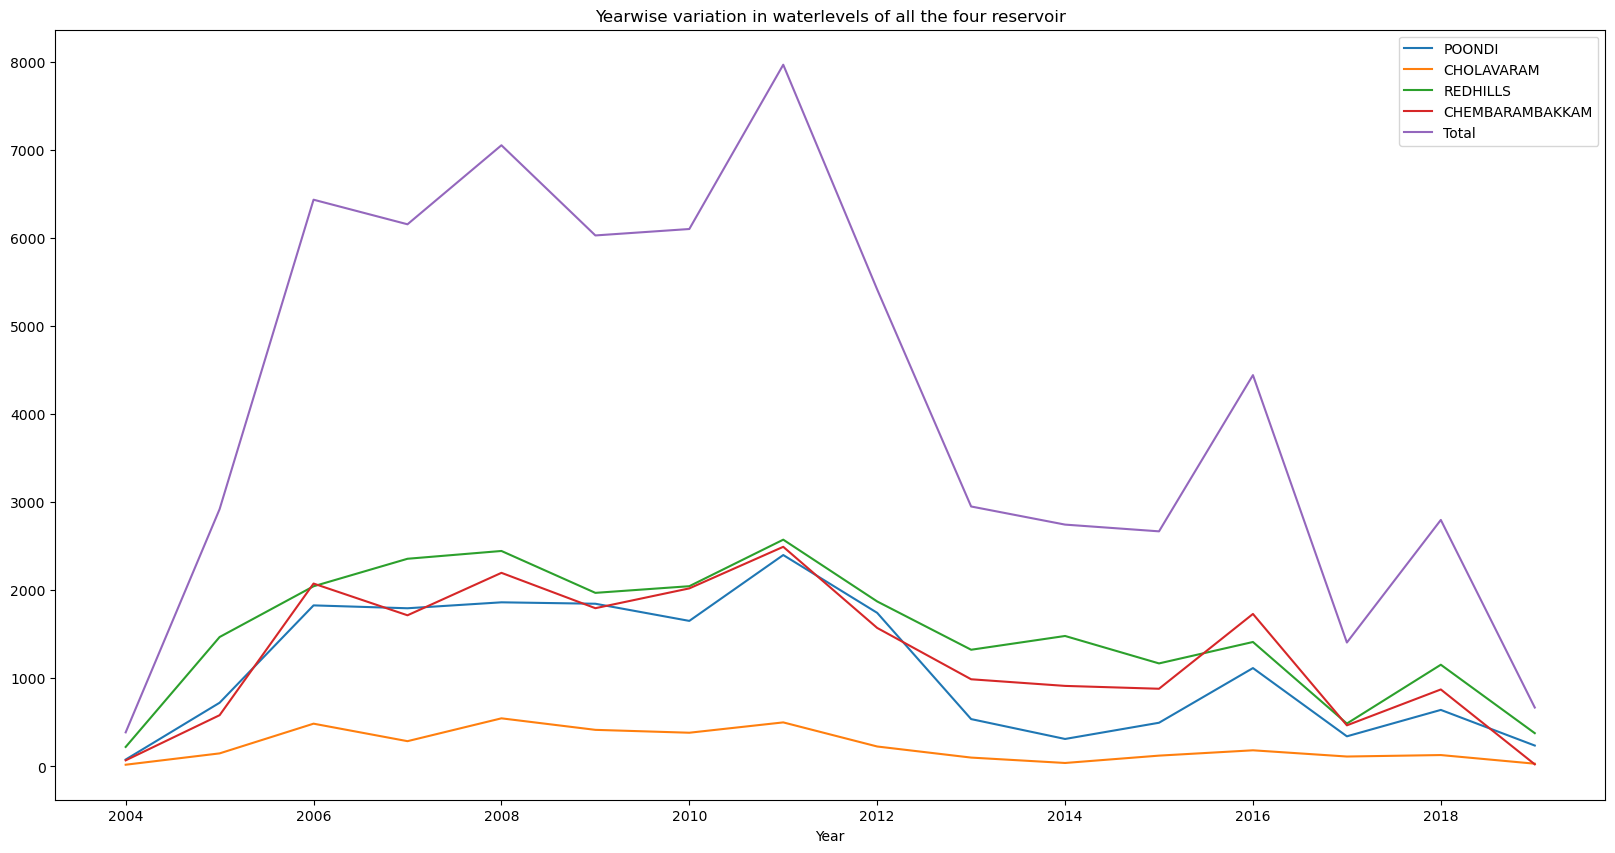

In [45]:
Yearwise.plot(x='Year',y=['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM','Total'],figsize=(20,10))
plt.title('Yearwise variation in waterlevels of all the four reservoir')
plt.show()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='Year', ylabel='Total'>

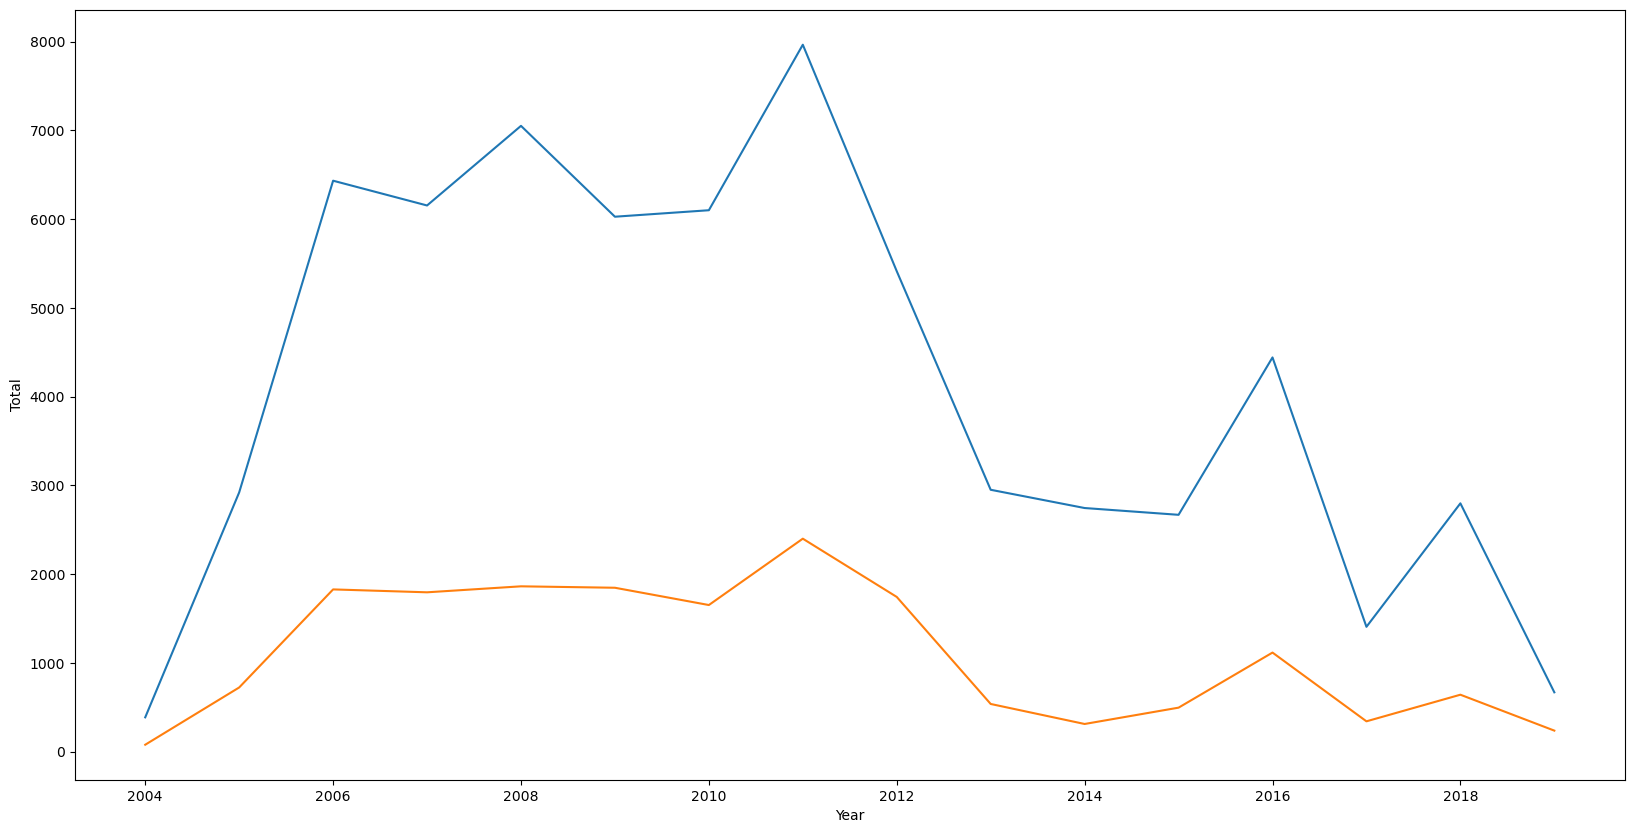

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(data=Yearwise,x='Year',y='Total')
sns.lineplot(data=Yearwise,x='Year',y='POONDI')

In [51]:
Yearwise1 = Yearwise.set_index('Year')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

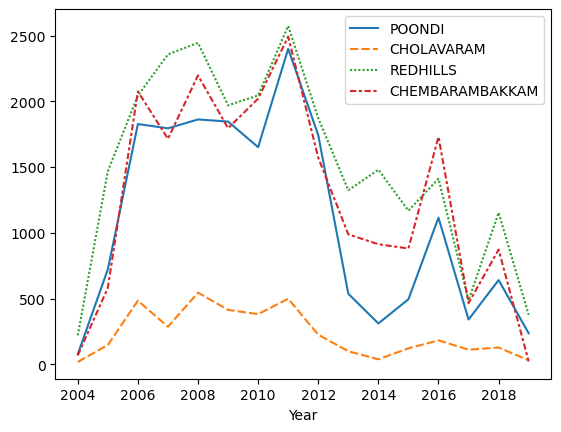

In [52]:
sns.lineplot(data=Yearwise1[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']])

In [64]:
chennai['month']=pd.Categorical(chennai['month'])
chennai['Year']=pd.Categorical(chennai['Year'])

In [65]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   month            5647 non-null   category      
 6   Year             5647 non-null   category      
 7   Total            5647 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 276.9 KB


In [70]:
#plt.figure(figsize=(14,8))
#sns.barplot(x='Year',y='Total',hue='month',data=chennai)
#plt.title('Mean Yearly waterlevel in all the four reservoir')
#plt.show()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Year', ylabel='Total'>

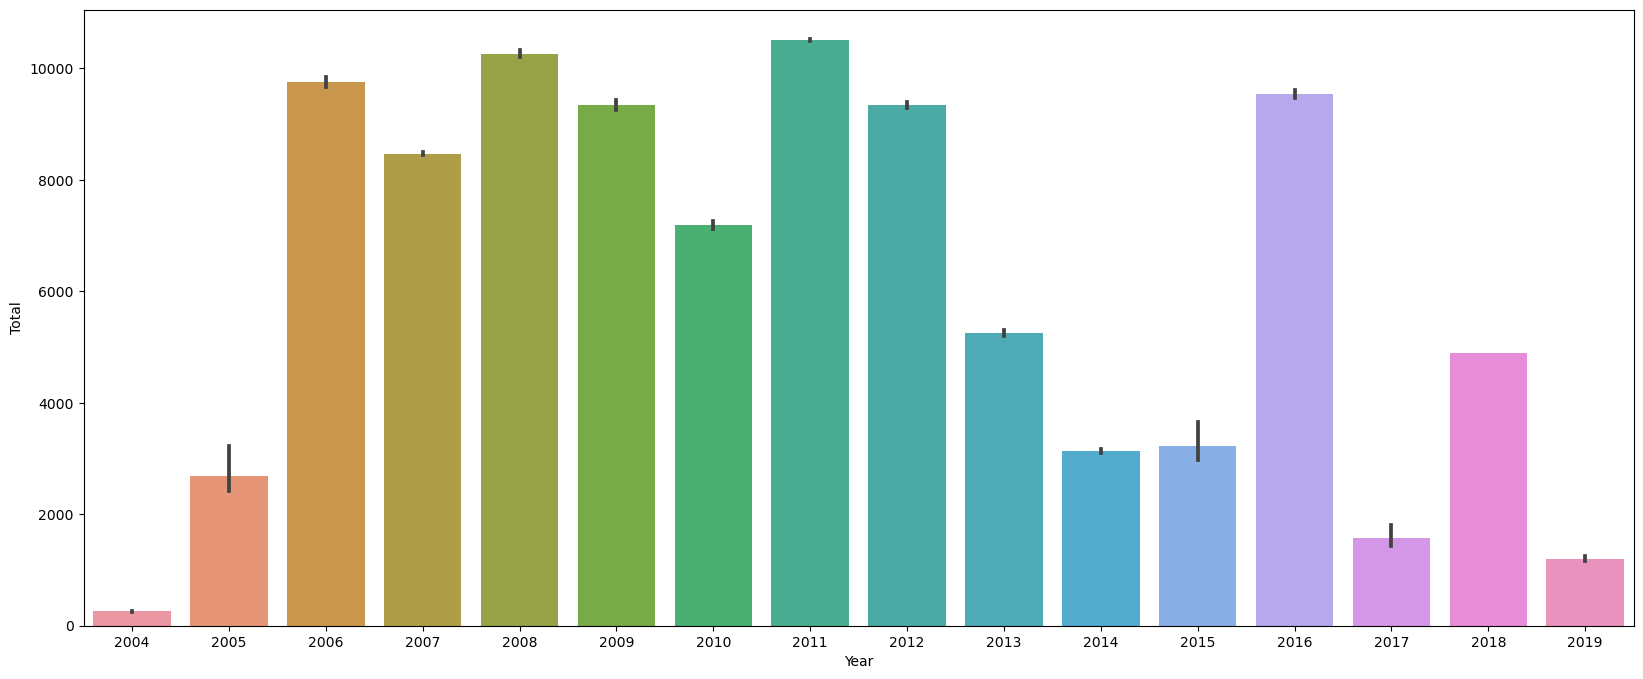

In [72]:
jan = chennai[chennai['month']==1]
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Total',data=jan)

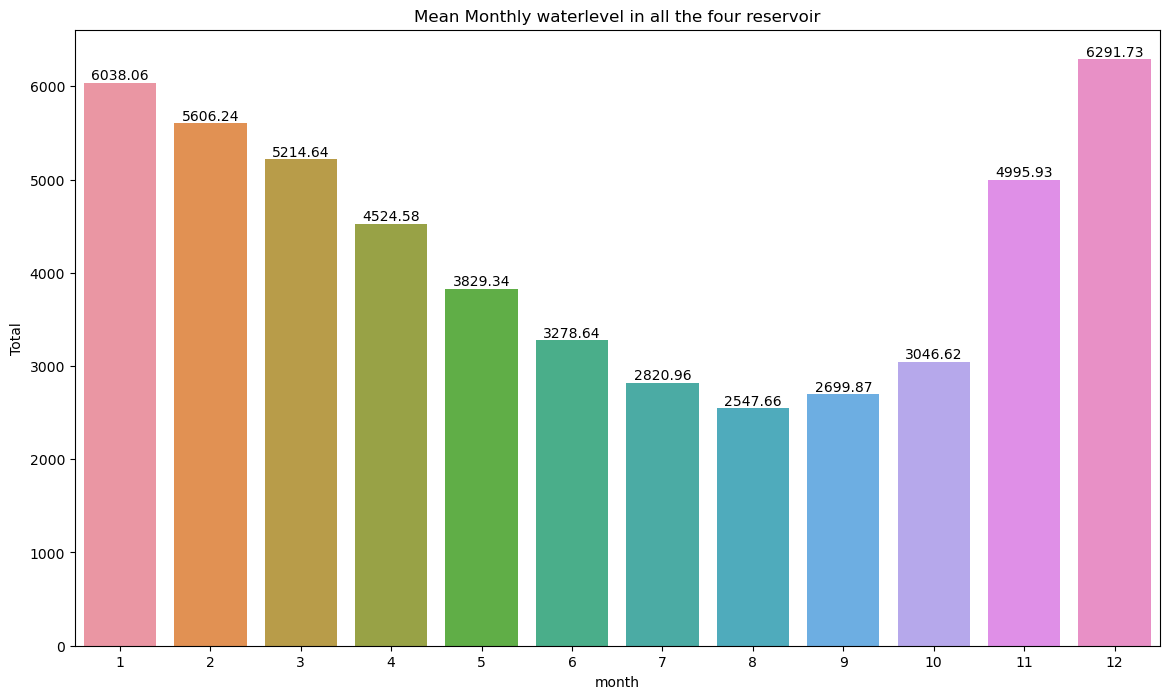

In [73]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='month',y='Total',data=Monthwise)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Mean Monthly waterlevel in all the four reservoir')
plt.show()

### Inferences

* Although chennai receive some rainfall in July, Aug, Sep due to SW monsoon but majority of the rainfall happens in Nov-Dec due to NE monsoon

* From 2006 to 2010, NE monsoon had much more contribution than SW monsoon. In last few years, however, either both SW and NE are contributing equally or SW is contributing more.

* Delining in NE monsoon rainfall in second half of 2010s 